# Deep Learning Project 4-1

## Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# turn off warnings for final notebook
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Load CIFAR Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
images = X_train[0:10, :, :, :] #choose the first ten images
images_tf = tf.convert_to_tensor(images, dtype=tf.float32) #input must be one of the following types: half, bfloat16, float32, float64.

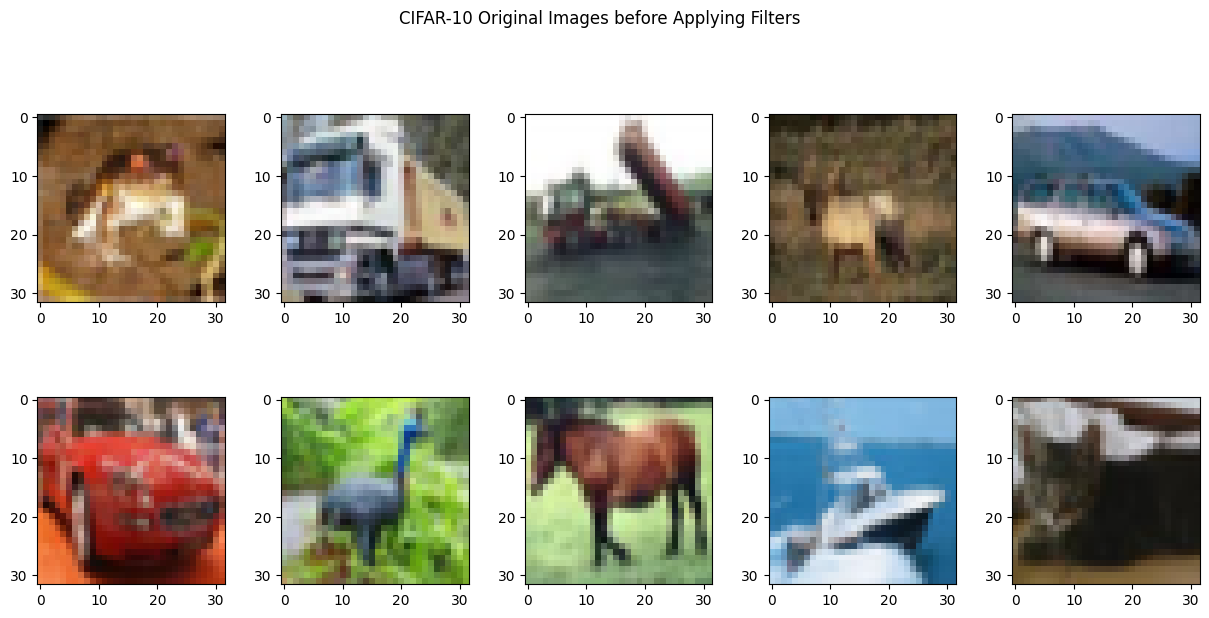

In [6]:
fig = plt.figure(figsize = (15, 7))

plt.subplots_adjust(wspace=0.3,
                    hspace=0.1)

plt.suptitle("CIFAR-10 Original Images before Applying Filters")


for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i])
plt.show()

## Designing Two Diagonal Filters for Convolution

In [7]:
filters = np.zeros((3, 3, 3, 2))
eye = np.eye(3) #identity matrix

for i in range(3):  # for each RGB channel
    filters[:, :, i, 0] = eye
    filters[:, :, i, 1] = np.fliplr(eye) #Flipped array in left-right direction.


In [8]:
print(filters[:, :,0, 0])

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


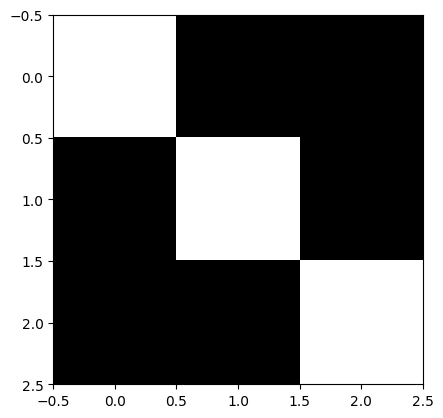

In [9]:
plt.imshow(filters[:, :, :, 0])

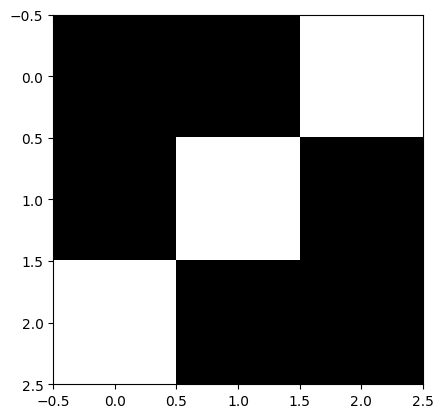

In [10]:
plt.imshow(filters[:, :, :, 1])

## Applying Convolution with Diagonal Filters on CIFAR10 Images

In [13]:
filters_tf = tf.convert_to_tensor(filters, dtype=tf.float32) #must have the same type as input. A 4-D tensor of shape [filter_height, filter_width, in_channels, out_channels]

# apply filters
convolved_images = tf.nn.conv2d(images_tf, filters_tf, strides=1 , padding='SAME')

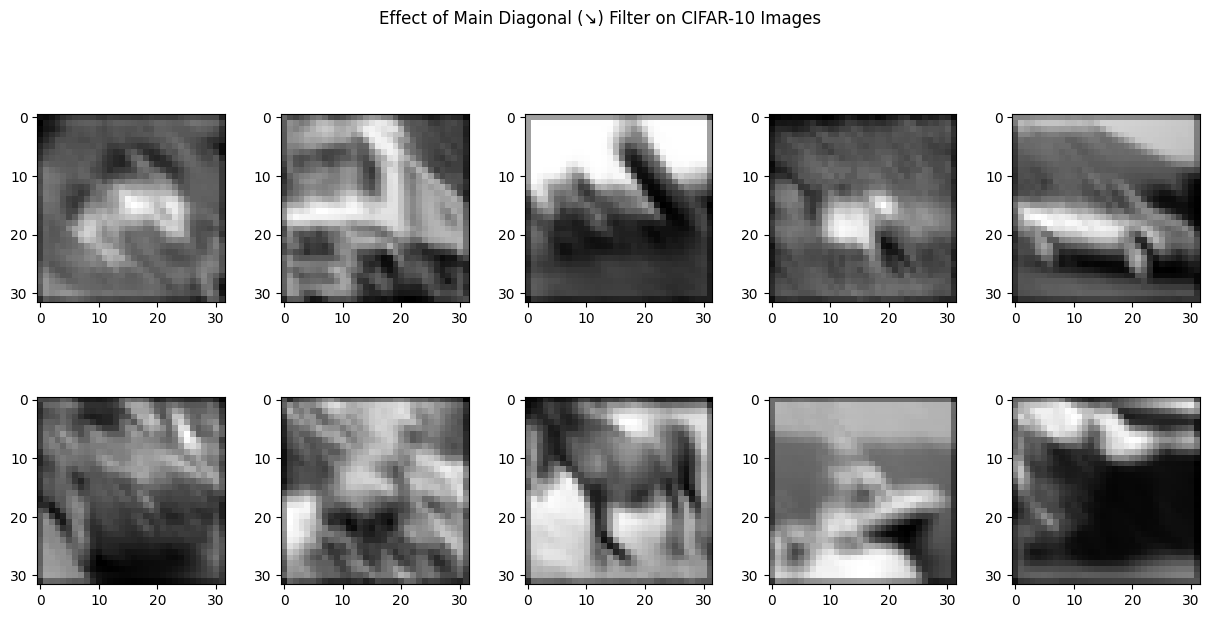

In [14]:
fig = plt.figure(figsize = (15, 7))

plt.subplots_adjust(wspace=0.3,
                    hspace=0.1)

plt.suptitle("Effect of Main Diagonal (↘) Filter on CIFAR-10 Images")

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(convolved_images[i, :, :, 0].numpy(), cmap='gray')
plt.show()

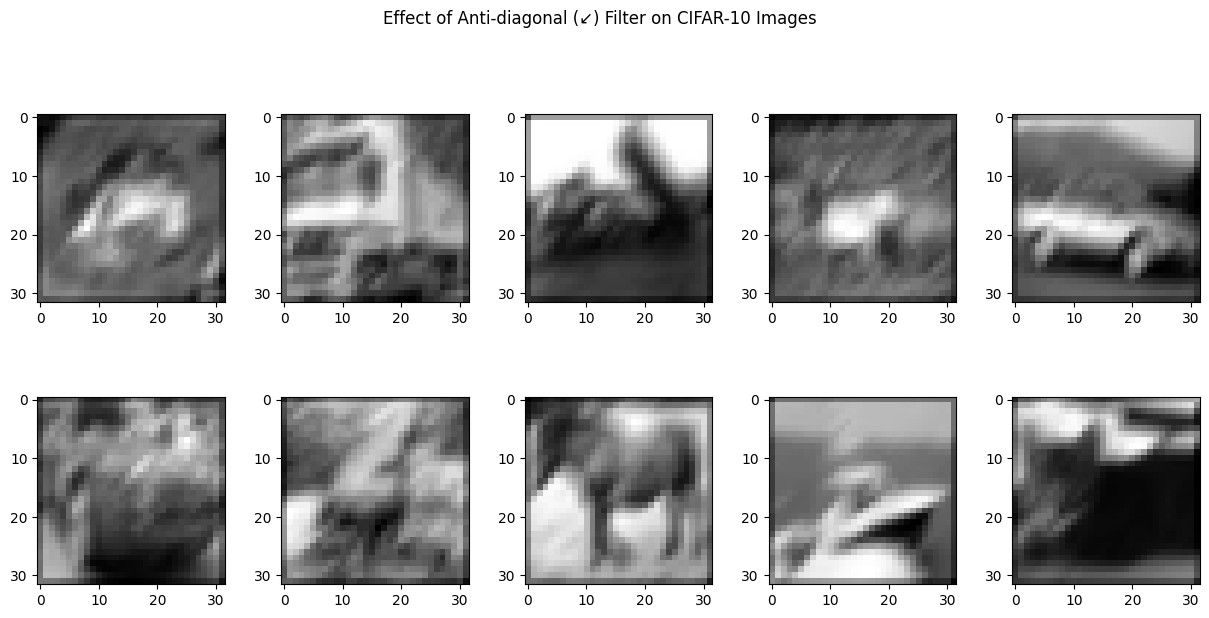

In [19]:
fig = plt.figure(figsize = (15, 7))

plt.subplots_adjust(wspace=0.3,
                    hspace=0.1)

plt.suptitle("Effect of Anti-diagonal (↙) Filter on CIFAR-10 Images")

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(convolved_images[i, :, :, 1].numpy(), cmap='gray')
plt.show()